In [221]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

In [222]:
def read_img(image, read_mode = cv2.IMREAD_COLOR):
    return cv2.imread("../data/" + image, read_mode)

def to_gray(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

(320, 500, 3)
uint8
(320, 500)
[[81 77 77]
 [81 78 76]
 [82 79 77]]


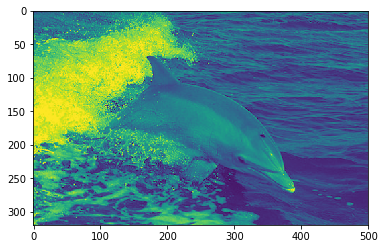

In [223]:
dolphin = read_img("dolphin.png")
dolphin_gray = to_gray(dolphin)

print(dolphin.shape)
print(dolphin.dtype)
plt.imshow(dolphin_gray)
print(dolphin_gray.shape)
print(dolphin_gray[100:103, 200:203])

(320, 500)
(201, 151)


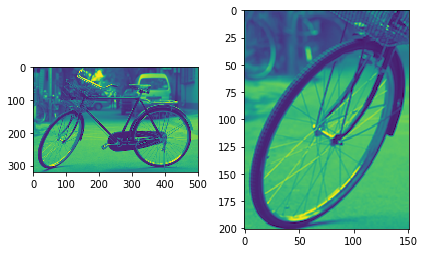

In [224]:
def crop():
    cycle = read_img("bicycle.png")
    cycle_gray = to_gray(cycle)
    cropped = cycle_gray[109:310, 9:160]
    print(cycle_gray.shape)
    print(cropped.shape)

    plt.subplot(121), plt.imshow(cycle_gray)
    plt.subplot(122), plt.imshow(cropped)
    plt.tight_layout()
    plt.show()
    
crop()

(258, 320, 3)


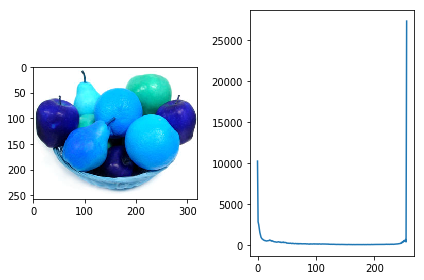

In [225]:
def hist():
    fruit = read_img("fruit.png")
    print(fruit.shape)
    hist = cv2.calcHist([fruit], [0], None, [256], [0, 256])

    plt.subplot(121), plt.imshow(fruit)
    plt.subplot(122), plt.plot(hist);
    plt.tight_layout()
    plt.show()
    
hist()

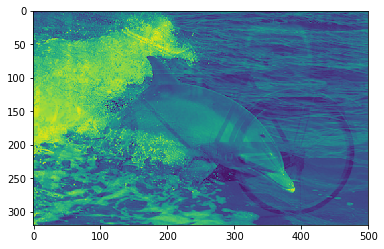

In [226]:
#blend 2 images
def blend(img1, img2, alpha):
    img = alpha * img1 + (1 - alpha) * img2
    return img

plt.imshow(blend(dolphin_gray, cycle_gray, .8))

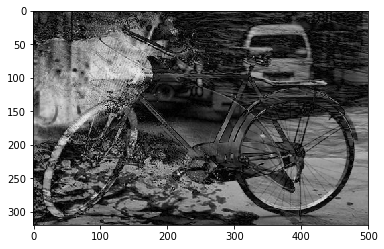

In [227]:
sub = cv2.absdiff(dolphin, cycle)
plt.imshow(sub)

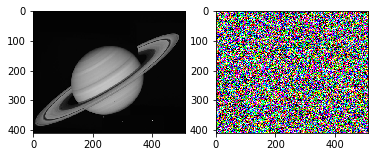

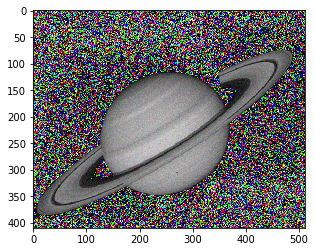

In [228]:
def add_noise():
    saturn = read_img('saturn.png')
    noise_sigma = 10
    noise = np.random.normal(scale = noise_sigma, size = saturn.shape).astype('uint8')
    noisy_img = saturn + noise

    plt.subplot(121), plt.imshow(saturn)
    plt.subplot(122), plt.imshow(noise)
    plt.show()
    plt.imshow(noisy_img)
    plt.show()
    
add_noise()

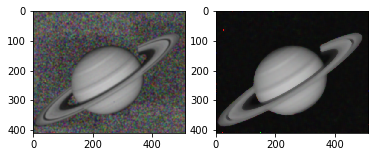

In [229]:
def remove_noise():
    filter_size = 11
    filter_sigma = 2
    gauss_blur = cv2.GaussianBlur(noisy_img, (filter_size, filter_size), filter_sigma)
    median_blur = cv2.medianBlur(noisy_img, filter_size)

    plt.subplot(121), plt.imshow(gauss_blur)
    plt.subplot(122), plt.imshow(median_blur)
    plt.show()
    
remove_noise()

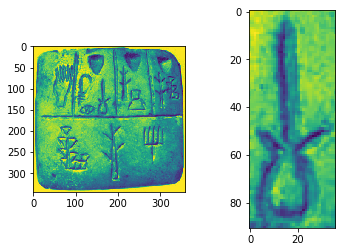

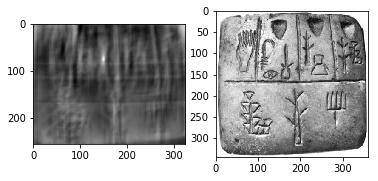

(149, 74) (185, 165)


In [230]:
def find_template():
    tablet = read_img('tablet.png', cv2.IMREAD_GRAYSCALE)
    template = tablet[74:165, 149:185]

    h, w = template.shape
    res = cv2.matchTemplate(tablet, template, cv2.TM_CCOEFF)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    plt.subplot(121), plt.imshow(tablet)
    plt.subplot(122), plt.imshow(template)
    plt.show()

    plt.subplot(121), plt.imshow(res, cmap = 'gray')
    plt.subplot(122), plt.imshow(tablet, cmap = 'gray')
    plt.show()
    print(top_left, bottom_right)
    
find_template()

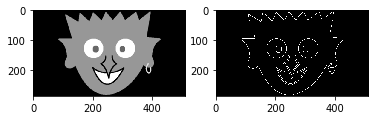

In [238]:
def edge_detect():
    img = read_img('frizzy.png', 0)
    edges = cv2.Canny(img,100,200)

    plt.subplot(121), plt.imshow(img,cmap = 'gray')
    plt.subplot(122), plt.imshow(edges,cmap = 'gray')
    plt.show()

edge_detect()